<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 Regression Challenge

_Authors: Joel Quek (SG)_

# Problem Statement

The question I wish to answer is: What are factors that have a great effect on housing price?

I will create models for housing price prediction based on multiple key factors.


# Table of Contents

# Import Libraries 

In [1452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso,RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

from IPython.display import display #display allows display of all columns with headers

%matplotlib inline

In [1453]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cleaned Data Sets and [Column Documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

The data has been cleaned in another file titled 'project_2_data_clean.ipynb'

I grouped the data according to different classes of factors affecting house value
1. Location and Proximity to Amenities
2. Quality and Condition of the Home
3. Parts of the Home
4. Dimensions
5. Utilities and Intangible Factors
6. Time Factors
7. Price Factors

Documentation of the column headers can be found at the [Journal of Statistics Education](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [1454]:
location_proximity_df=pd.read_csv('location_proximity.csv')
quality_condition_df=pd.read_csv('quality_condition.csv')
parts_of_home_df=pd.read_csv('parts_of_home.csv')
dimensions_df=pd.read_csv('dimensions.csv')
utilities_intangible_df=pd.read_csv('utilities_intangible.csv')
time_factors_df=pd.read_csv('time_factors.csv')
price_factors_df=pd.read_csv('price_factors.csv')

# Factor 1: Location and Proximity 

In [1455]:
location_proximity_df.drop(['Unnamed: 0', 'Neighborhood'], axis=1, inplace=True)
price_factors_df.drop(['Unnamed: 0', 'Sale Type','SalePrice'], axis=1, inplace=True)
location_proximity_price_df = location_proximity_df.join(price_factors_df, how='outer')
print(location_proximity_price_df.shape)
location_proximity_price_df.head(3)

(1887, 11)


,MS SubClass,MS Zoning,Lot Config,Condition 1,Condition 2,Bldg Type,Land Contour,Land Slope,Street,Lot Shape,Price Per Sq Ft
0,2 Storey 1946 Newer,Residential Low Density,CulDSac,RRAe,Norm,1Fam,Lvl,Gtl,Pave,IR1,9.654509
1,2 Storey 1946 Newer,Residential Low Density,CulDSac,Norm,Norm,1Fam,Lvl,Gtl,Pave,IR1,19.143752
2,1 Storey Newer All,Residential Low Density,Inside,Norm,Norm,1Fam,Lvl,Gtl,Pave,Reg,13.759152


**Dropping the Neighbourhood Data**

You must be wondering why I am not including the neighbourhood data in my analysis.

Initially I included the 'Neighbourhood' data in the modelling, but the result was that the coefficients for 'Bldg Type_Duplex' and 'MS SubClass_Duplex All' were unusually large. I removed the neighbourhood data and did a re-modelling (get the pun?).

---

## Data Dictionary

|Header|Remarks|
|----|----|
|MS SubClass (Nominal): | Identifies the type of dwelling involved in the sale.|
|MS Zoning (Nominal): | Identifies the general zoning classification of the sale.|
|Lot Config (Nominal): | Lot configuration|
|[DROPPED] Neighborhood (Nominal): | Physical locations within Ames city limits |
|Condition 1 (Nominal): | Proximity to various conditions|
|Condition 2 (Nominal): | Proximity to various conditions (if more than one is present)|
|Bldg Type (Nominal): | Type of dwelling|
|Land Contour (Nominal): | Flatness of the property|
|Land Slope (Ordinal): | Slope of property|
|Street (Nominal): | Type of road access to property|
|Lot Shape (Ordinal): | General shape of property|


In [1456]:
location_proximity_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      1887 non-null   object 
 1   MS Zoning        1887 non-null   object 
 2   Lot Config       1887 non-null   object 
 3   Condition 1      1887 non-null   object 
 4   Condition 2      1887 non-null   object 
 5   Bldg Type        1887 non-null   object 
 6   Land Contour     1887 non-null   object 
 7   Land Slope       1887 non-null   object 
 8   Street           1887 non-null   object 
 9   Lot Shape        1887 non-null   object 
 10  Price Per Sq Ft  1887 non-null   float64
dtypes: float64(1), object(10)
memory usage: 162.3+ KB


There are some variables that might be correlated.

Also I will need to know which variables are **qualitative** and which are **quantitative** [referring to 4.02 lab]

Given that all the datatypes are objects (except price per sq feet), this means I need to hot-encode the object data 

---

## Hot Encode Categorical Data [via get_dummies]

In [1457]:
location_proximity_price_df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Config', 'Condition 1', 'Condition 2',
       'Bldg Type', 'Land Contour', 'Land Slope', 'Street', 'Lot Shape',
       'Price Per Sq Ft'],
      dtype='object')

In [1458]:
location_proximity_price_dummies_df = pd.get_dummies(location_proximity_price_df,columns=['MS SubClass', 'MS Zoning', 'Lot Config', 'Condition 1',
       'Condition 2', 'Bldg Type', 'Land Contour', 'Land Slope', 'Street',
       'Lot Shape'], drop_first=True)

print(location_proximity_price_dummies_df.shape)
pd.set_option('display.max_columns', None)

location_proximity_price_dummies_df.head(3)


(1887, 52)


,Price Per Sq Ft,MS SubClass_1 Storey Newer All,MS SubClass_1 Storey PUD,MS SubClass_1 Storey W/Finished Attic,MS SubClass_1.5 Finished,MS SubClass_1.5 Storey PUD,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,MS SubClass_2 Storey 1946 Older,MS SubClass_2 Storey PUD,MS SubClass_2.5 Story All,MS SubClass_Duplex All,MS SubClass_Family Conversion,MS SubClass_PUD Multi,MS SubClass_Split,MS SubClass_Split Foyer,MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Mod,Land Slope_Sev,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,9.654509,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,19.143752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,13.759152,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


## Correlation of Various Location and Proximity Factors

In [1459]:
location_proximity_price_dummies_df.corr()

,Price Per Sq Ft,MS SubClass_1 Storey Newer All,MS SubClass_1 Storey PUD,MS SubClass_1 Storey W/Finished Attic,MS SubClass_1.5 Finished,MS SubClass_1.5 Storey PUD,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,MS SubClass_2 Storey 1946 Older,MS SubClass_2 Storey PUD,MS SubClass_2.5 Story All,MS SubClass_Duplex All,MS SubClass_Family Conversion,MS SubClass_PUD Multi,MS SubClass_Split,MS SubClass_Split Foyer,MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Mod,Land Slope_Sev,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
Price Per Sq Ft,1.000000,-0.249424,0.455424,-0.018491,-0.128728,0.115060,-0.018720,-0.000270,-0.042571,0.568168,-0.030436,-5.141445e-02,-0.090446,0.135922,-0.097095,-0.055449,0.340090,0.012900,-0.301127,0.143416,-0.080020,0.059191,-0.018496,1.363747e-01,-0.108601,0.169933,-0.019992,-0.001996,-0.066481,-0.057425,-0.027517,-0.013221,-0.037576,0.028186,0.021940,0.043665,-0.021321,-0.018060,-0.022799,-0.089883,-5.141445e-02,0.542174,0.524391,0.122387,-0.097536,0.022312,0.000848,-0.072938,0.046777,-0.058519,-0.048025,0.069209
MS SubClass_1 Storey Newer All,-0.249424,1.000000,-0.216712,-0.036569,-0.257649,-0.018270,-0.054927,-0.405632,-0.169113,-0.170189,-0.068597,-1.122082e-01,-0.100847,-0.051772,-0.173381,-0.095595,-0.066233,-0.032162,0.293210,-0.286094,0.051241,-0.016306,-0.001518,-3.669525e-02,0.049374,-0.002065,0.046060,0.051039,0.061700,-0.054959,0.022975,-0.025479,-0.042922,0.031779,0.022975,0.022975,-0.018270,-0.018270,0.007604,-0.092146,-1.122082e-01,-0.146243,-0.236760,-0.003624,0.060491,0.011814,0.015577,0.039858,-0.010760,0.000903,-0.039129,-0.046402
MS SubClass_1 Storey PUD,0.455424,-0.216712,1.000000,-0.012589,-0.088694,-0.006289,-0.018908,-0.139636,-0.058216,-0.058586,-0.023614,-3.862677e-02,-0.034716,-0.017822,-0.059685,-0.032908,0.074994,0.088637,-0.095212,0.047699,-0.014065,0.105001,0.014268,3.476728e-02,-0.060768,0.094971,-0.021851,-0.015351,-0.027546,-0.038091,-0.010899,-0.015426,-0.019936,0.012394,-0.010899,0.041433,-0.006289,-0.006289,-0.008897,-0.034716,-3.862677e-02,0.090012,0.795340,0.115635,-0.023589,-0.035016,0.053257,-0.018908,0.012589,0.040657,0.011354,-0.070503
MS SubClass_1 Storey W/Finished Attic,-0.018491,-0.036569,-0.012589,1.000000,-0.014967,-0.001061,-0.003191,-0.023563,-0.009824,-0.009886,-0.003985,-6.518082e-03,-0.005858,-0.003007,-0.010072,-0.005553,-0.010903,-0.003529,-0.032931,0.046555,-0.012276,-0.007835,-0.003007,-2.384196e-02,-0.010254,-0.015779,-0.003687,-0.005553,-0.004648,0.077801,-0.001839,-0.002603,0.155339,-0.097595,-0.001839,-0.001839,-0.001061,-0.001061,-0.001501,-0.005858,-6.518082e-03,-0.008495,-0.013981,-0.009824,-0.006518,-0.061840,0.046304,-0.003191,0.002124,-0.007911,-0.003191,0.036528
MS SubClass_1.5 Finished,-0.128728,-0.257649,-0.088694,-0.014967,1.000000,-0.007477,-0.022480,-0.166013,-0.069213,-0.069653,-0.028075,-4.592345e-02,-0.041274,-0.021189,-0.070960,-0.039124,-0.076817,-0.001168,-0.187669,0.256210,-0.071984,-0.044283,-0.021189,3.919524e-02,0.012853,-0.079350,-0.025978,-0.039124,-0.032750,0.020651,-0.012958,0.013704,0.050841,-0.043640,-0.012958,-0.012958,-0.007477,-0.007477,-0.010577,-0.041274,-4.592345e-02,-0.059853,-0.098502,0.010424,-0.006889,-0.049281,0.009525,0.003705,0.014967,-0.034095,0.003705,0.168416
MS SubClass_1.5 Storey PUD,0.115060,-0.018270,-0.006289,-0.001061,-0.007477,1.000000,-0.001594,-0.011772,-0.004908,-0.004939,-0.001991,-3.256448e-03,-0.002927,-0.001502,-0.005032,-0.002774

## Model 1: Linear Regression on Location and Proximity Factors

### Step 1: Assemble our predictor variables (X) and our target (y) 

I will perform linear regression on Location and PRoximity Factors against the Price per Square Feet

In [1460]:
X = location_proximity_price_dummies_df.drop(columns = ["Price Per Sq Ft"])
y = location_proximity_price_dummies_df["Price Per Sq Ft"]

Note that X has been "dummified" earlier

In [1461]:
X.head()

,MS SubClass_1 Storey Newer All,MS SubClass_1 Storey PUD,MS SubClass_1 Storey W/Finished Attic,MS SubClass_1.5 Finished,MS SubClass_1.5 Storey PUD,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,MS SubClass_2 Storey 1946 Older,MS SubClass_2 Storey PUD,MS SubClass_2.5 Story All,MS SubClass_Duplex All,MS SubClass_Family Conversion,MS SubClass_PUD Multi,MS SubClass_Split,MS SubClass_Split Foyer,MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Mod,Land Slope_Sev,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [1462]:
y

0        9.654509
1       19.143752
2       13.759152
3       17.751479
4        9.729540
          ...    
1882    26.094069
1883     6.684492
1884    23.418894
1885    13.846154
1886    25.200000
Name: Price Per Sq Ft, Length: 1887, dtype: float64

### Step 2: Instantiate the model

In [1463]:
model = LinearRegression()

### Step 3: Fit the model

In [1464]:
model.fit(X,y)

LinearRegression()

### Step 4: Coefficients 

In [1465]:
X.columns

Index(['MS SubClass_1 Storey Newer All', 'MS SubClass_1 Storey PUD',
       'MS SubClass_1 Storey W/Finished Attic', 'MS SubClass_1.5 Finished',
       'MS SubClass_1.5 Storey PUD', 'MS SubClass_1.5 Unfinished',
       'MS SubClass_2 Storey 1946 Newer', 'MS SubClass_2 Storey 1946 Older',
       'MS SubClass_2 Storey PUD', 'MS SubClass_2.5 Story All',
       'MS SubClass_Duplex All', 'MS SubClass_Family Conversion',
       'MS SubClass_PUD Multi', 'MS SubClass_Split', 'MS SubClass_Split Foyer',
       'MS Zoning_Floating Village Residential',
       'MS Zoning_Residential High Density',
       'MS Zoning_Residential Low Density',
       'MS Zoning_Residential Medium Density', 'Lot Config_CulDSac',
       'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside',
       'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA',
       'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn',
       'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr',
       'Condition 2_Norm', 

In [1466]:
model.coef_

array([ 4.36464575, 19.58543506,  3.01295435,  2.74286711, 46.73700924,
        4.02152439,  8.33746162,  5.0560908 , 24.36115139,  2.58623112,
        2.02255557,  2.43302371, 18.90379738,  2.9975256 ,  3.19432763,
       13.6271917 ,  2.0083537 ,  5.42173887,  7.23955464, -0.14158921,
       -1.60873221, -2.21814436,  1.15998912,  1.1328909 ,  2.40047282,
       -1.0120883 ,  4.75542479, -2.80555789,  0.09798195,  0.8014541 ,
        2.1850937 ,  1.626588  ,  0.80897753, 11.17851911,  6.90397776,
       -5.46347643, -2.45693657, -5.33717295, -2.84213421,  2.02255557,
       20.50299873,  8.00401174,  6.96454081, -2.86140344,  1.23280093,
        0.8979427 , -6.04332536,  4.38458006, -4.25854575, -8.0017232 ,
        0.76921319])

In [1467]:
coef_dict = dict(zip(X.columns, model.coef_))
coef_dict

{'MS SubClass_1 Storey Newer All': 4.36464574590268,
 'MS SubClass_1 Storey PUD': 19.585435063270133,
 'MS SubClass_1 Storey W/Finished Attic': 3.0129543521236086,
 'MS SubClass_1.5 Finished': 2.7428671120099177,
 'MS SubClass_1.5 Storey PUD': 46.73700923611713,
 'MS SubClass_1.5 Unfinished': 4.021524393643372,
 'MS SubClass_2 Storey 1946 Newer': 8.33746161519583,
 'MS SubClass_2 Storey 1946 Older': 5.056090803042413,
 'MS SubClass_2 Storey PUD': 24.36115138918518,
 'MS SubClass_2.5 Story All': 2.5862311230515522,
 'MS SubClass_Duplex All': 2.022555571125983,
 'MS SubClass_Family Conversion': 2.4330237126189123,
 'MS SubClass_PUD Multi': 18.903797380249312,
 'MS SubClass_Split': 2.9975255963514265,
 'MS SubClass_Split Foyer': 3.194327630140751,
 'MS Zoning_Floating Village Residential': 13.627191697140546,
 'MS Zoning_Residential High Density': 2.008353697368707,
 'MS Zoning_Residential Low Density': 5.421738865804948,
 'MS Zoning_Residential Medium Density': 7.239554643687749,
 'Lot C

Sort Coefficient Dictionary based on Coefficient Strength

I sort the coefficients to check which have the greatest effect

In [1468]:
{k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}

# source https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

{'Lot Shape_IR3': -8.00172320385965,
 'Land Slope_Sev': -6.043325362026236,
 'Condition 2_RRAe': -5.46347643305961,
 'Condition 2_RRNn': -5.337172949471586,
 'Lot Shape_IR2': -4.258545751984268,
 'Land Contour_Low': -2.861403435233408,
 'Bldg Type_2fmCon': -2.8421342131348246,
 'Condition 1_RRAe': -2.805557893172365,
 'Condition 2_RRAn': -2.456936568300069,
 'Lot Config_FR3': -2.2181443612791623,
 'Lot Config_FR2': -1.6087322052464286,
 'Condition 1_PosA': -1.012088304687408,
 'Lot Config_CulDSac': -0.1415892133681909,
 'Condition 1_RRAn': 0.09798194816903866,
 'Lot Shape_Reg': 0.7692131920240923,
 'Condition 1_RRNe': 0.8014541032287255,
 'Condition 2_Norm': 0.8089775297246052,
 'Land Slope_Mod': 0.8979426951029558,
 'Condition 1_Feedr': 1.132890898427272,
 'Lot Config_Inside': 1.1599891247774314,
 'Land Contour_Lvl': 1.232800932534156,
 'Condition 2_Feedr': 1.6265879962325838,
 'MS Zoning_Residential High Density': 2.008353697368707,
 'MS SubClass_Duplex All': 2.022555571125983,
 'Bld

In [1469]:
{k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}


{'MS SubClass_1.5 Storey PUD': 46.73700923611713,
 'MS SubClass_2 Storey PUD': 24.36115138918518,
 'Bldg Type_Twnhs': 20.50299873154703,
 'MS SubClass_1 Storey PUD': 19.585435063270133,
 'MS SubClass_PUD Multi': 18.903797380249312,
 'MS Zoning_Floating Village Residential': 13.627191697140546,
 'Condition 2_PosA': 11.17851910651528,
 'MS SubClass_2 Storey 1946 Newer': 8.33746161519583,
 'Bldg Type_TwnhsE': 8.004011742678237,
 'MS Zoning_Residential Medium Density': 7.239554643687749,
 'Land Contour_HLS': 6.964540806199096,
 'Condition 2_PosN': 6.903977758956987,
 'MS Zoning_Residential Low Density': 5.421738865804948,
 'MS SubClass_2 Storey 1946 Older': 5.056090803042413,
 'Condition 1_PosN': 4.755424786753469,
 'Street_Pave': 4.3845800599747875,
 'MS SubClass_1 Storey Newer All': 4.36464574590268,
 'MS SubClass_1.5 Unfinished': 4.021524393643372,
 'MS SubClass_Split Foyer': 3.194327630140751,
 'MS SubClass_1 Storey W/Finished Attic': 3.0129543521236086,
 'MS SubClass_Split': 2.9975255

#### Interpretation of Coefficients

Reminder to self: Refer to lecture 3.01 Linear Regression

- The effect of a home being 'MS SubClass_1.5 Storey PUD' contributes to the price per square feet increasing by 46.737

- The effect of a home being 'MS SubClass_2 Storey PUD' contributes to the price per square feet increasing by 24.361

- The effect of a home being 'Lot Shape_IR3' contributes to the price per square feet decreasing by 8.001

- The effect of a home being 'Land Slope_Sev' contributes to the price per square feet decreasing by 6.043

Here are other effects on Price per Square Feet

Factors with Positive Effect on Price

- 'Bldg Type_Twnhs': 20.50299873154703,
- 'MS SubClass_1 Storey PUD': 19.585435063270133,
- 'MS SubClass_PUD Multi': 18.903797380249312,
- 'MS Zoning_Floating Village Residential': 13.627191697140546,
- 'Condition 2_PosA': 11.17851910651528,

Factors with Negative Effect on Price

- 'Condition 2_RRAe': -5.46347643305961,
- 'Condition 2_RRNn': -5.337172949471586,
- 'Lot Shape_IR2': -4.258545751984268,
- 'Land Contour_Low': -2.861403435233408,

### Step 5: Make Predictions

In [1470]:
X.head(3)

,MS SubClass_1 Storey Newer All,MS SubClass_1 Storey PUD,MS SubClass_1 Storey W/Finished Attic,MS SubClass_1.5 Finished,MS SubClass_1.5 Storey PUD,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,MS SubClass_2 Storey 1946 Older,MS SubClass_2 Storey PUD,MS SubClass_2.5 Story All,MS SubClass_Duplex All,MS SubClass_Family Conversion,MS SubClass_PUD Multi,MS SubClass_Split,MS SubClass_Split Foyer,MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Mod,Land Slope_Sev,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [1471]:
y_preds = model.predict(X)
y_preds # y_preds are points on the regression plane 
# y_preds are the predicted price per square feet

array([15.38300917, 20.58903989, 18.68701555, ..., 15.83243599,
       17.52702643, 22.65983142])

### Step 6: Evaluate the model

$R^2$

In [1472]:
# R2:
metrics.r2_score(y, y_preds)

0.6944707123084155

69.4% of the data fall on the regression plane. Decent but not great!

MSE

In [1473]:
# MSE:
metrics.mean_squared_error(y, y_preds) 

51.95700367033721

How is our model?

It is ok. Score is not high but decent enough that I will not need to regularize.

---

# Factor 2: Quality and Condition of Home

In [1474]:
# price_factors_df.drop(['Sale Type','SalePrice'], axis=1, inplace=True)
price_factors_df.head()

,Price Per Sq Ft
0,9.654509
1,19.143752
2,13.759152
3,17.751479
4,9.729540


In [1475]:
quality_condition_df.drop('Unnamed: 0', axis=1, inplace=True)
# quality_condition_price_df = location_proximity_df.join(price_factors_df, how='outer')
print(quality_condition_df.shape)
quality_condition_df.head(3)

(1887, 7)


,Overall Quality,Overall Condition,Exterior Quality,Exterior Condition,Functional,Garage Qual,Garage Cond
0,6,8,4,3,Typ,TA,TA
1,7,5,4,3,Typ,TA,TA
2,5,7,3,4,Typ,TA,TA


## Data Dictionary

|Factor|Elaboration|
|----|----|
|Overall Qual (Ordinal): | Rates the overall material and finish of the house|
|Overall Cond (Ordinal): |Rates the overall condition of the house|
Exter Qual (Ordinal): |Evaluates the quality of the material on the exterior|
Exter Cond (Ordinal): |Evaluates the present condition of the material on the exterior|
Functional (Ordinal): |Home functionality (Assume typical unless deductions are warranted)|
Garage Qual (Ordinal): |Garage quality|
Garage Cond (Ordinal): |Garage condition|


## Hot Encode the Garage Qual,	Garage Cond and Functional columns


In [1476]:
quality_condition_df['Garage Qual'].value_counts()

TA    1787
Fa      77
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [1477]:
quality_condition_df['Functional'].value_counts()

Typ     1777
Min1      37
Min2      36
Mod       21
Maj1      10
Maj2       4
Sal        1
Sev        1
Name: Functional, dtype: int64

In [1478]:
def functional(x):
    if x == 'Typ':
        x=8
    elif x == 'Min1':
        x=7
    elif x=='Min2':
        x=6
    elif x=='Mod':
        x=5
    elif x=='Maj1':
        x=4
    elif x=='Maj2':
        x=3
    elif x=='Sal':
        x=2
    elif x=='Sev':
        x=1
    else:
        x=0
    return x

In [1479]:
def ranking(x):
    if x=='Ex':
        x=6
    elif x=='Gd':
        x=5
    elif x=='TA':
        x=4
    elif x=='Fa':
        x=3
    elif x=='Po':
        x=2
    else:
        x=0
    return x

In [1480]:
quality_condition_df['Garage Qual'] = quality_condition_df['Garage Qual'].map(ranking)

quality_condition_df['Garage Cond'] = quality_condition_df['Garage Cond'].map(ranking)

quality_condition_df['Functional'] = quality_condition_df['Functional'].map(functional)

In [1481]:
quality_condition_df.head(3)

,Overall Quality,Overall Condition,Exterior Quality,Exterior Condition,Functional,Garage Qual,Garage Cond
0,6,8,4,3,8,4,4
1,7,5,4,3,8,4,4
2,5,7,3,4,8,4,4


In [1482]:
quality_condition_df.corr()

,Overall Quality,Overall Condition,Exterior Quality,Exterior Condition,Functional,Garage Qual,Garage Cond
Overall Quality,1.000000,-0.165577,0.742879,-0.050053,0.112768,0.198798,0.154428
Overall Condition,-0.165577,1.000000,-0.209861,0.403387,0.071152,0.012637,0.032124
Exterior Quality,0.742879,-0.209861,1.000000,-0.016070,0.090041,0.147637,0.090646
Exterior Condition,-0.050053,0.403387,-0.016070,1.000000,0.038725,0.076043,0.096563
Functional,0.112768,0.071152,0.090041,0.038725,1.000000,0.063263,0.070232
Garage Qual,0.198798,0.012637,0.147637,0.076043,0.063263,1.000000,0.531790
Garage Cond,0.154428,0.032124,0.090646,0.096563,0.070232,0.531790,1.000000


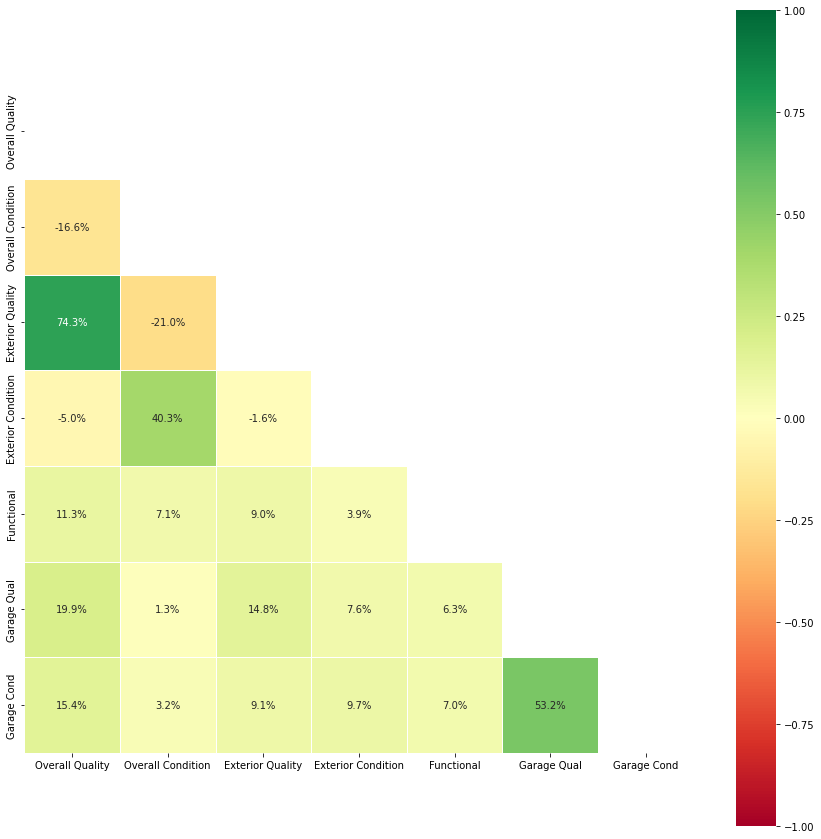

In [1483]:
plot=plt.figure(figsize = (15,15))
mask = np.zeros_like(quality_condition_df.corr())
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(quality_condition_df.corr(), mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")

We can see from the heatmap that the following factors are correlated:

- Overall Quality	and Exterior Quality 	

- Overall Condition and Exterior Condition	

- Garage Qual	and Garage Cond

So I will create interaction columns between these pairs.

## Feature Engineering Interaction Columns for Model 2

In [1484]:
quality_condition_df['Overall_Exterior_Quality']=quality_condition_df['Overall Quality']*quality_condition_df['Exterior Quality']
quality_condition_df['Overall_Exterior_Condition']=quality_condition_df['Overall Condition']*quality_condition_df['Exterior Condition']
quality_condition_df['Garage_Qual_Condition']=quality_condition_df['Garage Qual']*quality_condition_df['Garage Cond']

In [1485]:
quality_condition_df.head()

,Overall Quality,Overall Condition,Exterior Quality,Exterior Condition,Functional,Garage Qual,Garage Cond,Overall_Exterior_Quality,Overall_Exterior_Condition,Garage_Qual_Condition
0,6,8,4,3,8,4,4,24,24,16
1,7,5,4,3,8,4,4,28,15,16
2,5,7,3,4,8,4,4,15,28,16
3,5,5,3,3,8,4,4,15,15,16
4,6,8,3,3,8,4,4,18,24,16


---

## Model 2

In [1486]:
#X2 = quality_condition_df.drop(['Overall Quality','Overall Condition','Exterior Quality','Exterior Condition','Functional','Garage Qual','Garage Cond'], axis=1, inplace=True)
X2 = quality_condition_df[['Overall_Exterior_Quality','Overall_Exterior_Condition','Garage_Qual_Condition']]
y2 = price_factors_df

In [1487]:
X2.head()

,Overall_Exterior_Quality,Overall_Exterior_Condition,Garage_Qual_Condition
0,24,24,16
1,28,15,16
2,15,28,16
3,15,15,16
4,18,24,16


In [1488]:
X2.shape

(1887, 3)

### Step 2: Instantiate the model

In [1489]:
model2 = LinearRegression()

### Step 3: Fit the model

In [1490]:
model2.fit(X2,y2)

LinearRegression()

### Step 4: Check out and interpret our coefficients

In [1491]:
for i in X2.columns:
    print (i)

Overall_Exterior_Quality
Overall_Exterior_Condition
Garage_Qual_Condition


In [1492]:
model2.coef_

array([[ 0.62668415, -0.13721295,  0.14778937]])

In [1493]:
model2_coef = dict(zip(X2.columns, model2.coef_[0]))


In [1494]:
{k: v for k, v in sorted(model2_coef.items(), key=lambda item: item[1], reverse=True)}


{'Overall_Exterior_Quality': 0.6266841499905329,
 'Garage_Qual_Condition': 0.14778937326062114,
 'Overall_Exterior_Condition': -0.13721294914852733}

In [1495]:
X2['Overall_Exterior_Quality'].value_counts(normalize=True)

15    0.248543
18    0.201378
28    0.152623
32    0.121887
21    0.071012
12    0.057234
24    0.056704
45    0.022258
36    0.018018
20    0.013249
50    0.011659
40    0.007419
9     0.005299
8     0.003180
10    0.002650
6     0.002650
16    0.001590
35    0.001590
27    0.000530
30    0.000530
Name: Overall_Exterior_Quality, dtype: float64

Interpretation of Coefficients

- Every increase in rating for Overall_Exterior_Quality has the effect of an increase in price per square feet by 0.626.
This is crucial as the maximum possible rating is 50. Which means a home could potentially have an increase by 31.3 per square foot.

### Step 5: Make predictions

In [1496]:
X2.head(3)

,Overall_Exterior_Quality,Overall_Exterior_Condition,Garage_Qual_Condition
0,24,24,16
1,28,15,16
2,15,28,16


In [1497]:
y2_preds = model2.predict(X2)
y2_preds # y_preds are points on the regression plane 
# y_preds are the predicted riders data

array([[22.45806561],
       [26.19971876],
       [16.26905647],
       ...,
       [18.4867128 ],
       [16.17277236],
       [21.81292971]])

### Step 6: Evaluate the model

In [1498]:
metrics.r2_score(y2, y2_preds)

0.17100769698946916

Only 17.1% of the data fall on the regression line. Terrible score.

In [1499]:
metrics.mean_squared_error(y2, y2_preds) # the error is large

140.97488478315142

How is our model?

Our model isn't ideal. We will need to regularize.

## Regularization of Model 2

Referring to lesson 3.06

In [1500]:
X2.head()

,Overall_Exterior_Quality,Overall_Exterior_Condition,Garage_Qual_Condition
0,24,24,16
1,28,15,16
2,15,28,16
3,15,15,16
4,18,24,16


In [1501]:
y2[:5]

,Price Per Sq Ft
0,9.654509
1,19.143752
2,13.759152
3,17.751479
4,9.729540


In [1502]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X2,
    y2,
    test_size=0.25,
    random_state=42
) 

In [1503]:
# Instantiate.
ridge_model2 = Ridge(alpha=10)

# Fit.
ridge_model2.fit(X_train, y_train)

# Best alpha
ridge_model2.alpha

10

In [1504]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.18272609923251115
0.12616451067313694


The $R^2$ score increased marginally.

## USE PIPELINE [KIV]

---

# Factor 3: Parts of the Home

In [1505]:
price_factors_df

,Price Per Sq Ft
0,9.654509
1,19.143752
2,13.759152
3,17.751479
4,9.729540
...,...
1882,26.094069
1883,6.684492
1884,23.418894
1885,13.846154


In [1506]:
price_factors_df['Price Per Sq Ft'].sort_values()

1492     1.324461
438      1.742138
880      2.504422
641      2.622689
684      2.797203
          ...    
376     83.845064
1122    84.067393
1389    87.294118
482     87.319666
1385    95.384615
Name: Price Per Sq Ft, Length: 1887, dtype: float64

In [1507]:
parts_of_home_df.drop('Unnamed: 0', axis=1, inplace=True)
parts_of_home_df.head()


,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Paved Drive
0,2Story,Gable,CompShg,HdBoard,Plywood,CBlock,TA,TA,No,GLQ,Unf,0.0,0.0,2,1,3,1,Gd,6,0,Attchd,RFn,2.0,Y
1,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,Gd,TA,No,GLQ,Unf,1.0,0.0,2,1,4,1,Gd,8,1,Attchd,RFn,2.0,Y
2,1Story,Gable,CompShg,VinylSd,VinylSd,CBlock,TA,TA,No,GLQ,Unf,1.0,0.0,1,0,3,1,Gd,5,0,Detchd,Unf,1.0,Y
3,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,Gd,TA,No,Unf,Unf,0.0,0.0,2,1,3,1,TA,7,0,BuiltIn,Fin,2.0,Y
4,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,PConc,Fa,Gd,No,Unf,Unf,0.0,0.0,2,0,3,1,TA,6,0,Detchd,Unf,2.0,N


---

## Data Dictionary

|Feature|Details|
|----|----|
|House Style (Nominal): |Style of dwelling|
|Roof Style (Nominal): |Type of roof|
|Roof Matl (Nominal): |Roof material|
|Exterior 1 (Nominal): |Exterior covering on house|
|Exterior 2 (Nominal): |Exterior covering on house (if more than one material)|
|Foundation (Nominal): |Type of foundation|
|Bsmt Qual (Ordinal): |Evaluates the height of the basement|
|Bsmt Cond (Ordinal): |Evaluates the general condition of the basement|
|Bsmt Exposure	(Ordinal): |Refers to walkout or garden level walls|
|BsmtFin Type 1	(Ordinal): |Rating of basement finished area|
|BsmtFinType 2	(Ordinal): |Rating of basement finished area (if multiple types)|
|Bsmt Full Bath (Discrete): |Basement full bathrooms|
|Bsmt Half Bath (Discrete): |Basement half bathrooms|
|Full Bath (Discrete): |Full bathrooms above grade|
|Half Bath (Discrete): |Half baths above grade|
|Bedroom (Discrete): |Bedrooms above grade (does NOT include basement bedrooms)|
|Kitchen (Discrete): |Kitchens above grade|
|KitchenQual (Ordinal): |Kitchen quality|
|TotRmsAbvGrd	(Discrete): |Total rooms above grade (does not include bathrooms)|
|Fireplaces (Discrete): |Number of fireplaces|
|Garage Type (Nominal): |Garage location|
|Garage Finish (Ordinal)	: |Interior finish of the garage|
|Garage Cars (Discrete): |Size of garage in car capacity|
|Paved Drive (Ordinal): |Paved driveway|


Ok there are a lot of factors here. Personally I will want to know how the following factors affect housing prices
- Roof Material
- Type of Foundation
- Basement Condition
- Basement Exposure
- BsmtFin
- Full Bath
- KitchenQual

I will do more feature engineering to modify the dataset.

---

## Feature Engineering for Model 3

In [1510]:
parts_of_home_df.columns

Index(['House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Paved Drive'],
      dtype='object')

In [ ]:
parts_of_home_df=parts_of_home_df[['Roof Matl','Foundation']]

In [1509]:
parts_of_home_df['Kitchen Qual'].value_counts()

TA    927
Gd    782
Ex    149
Fa     29
Name: Kitchen Qual, dtype: int64

## Model 3

In [ ]:
X3 = parts_of_home_df
y3 = price_factors_df

In [ ]:
X3 = pd.get_dummies(drop_first=True, data=X3)
X3.head()

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_P,Paved Drive_Y
0,0.0,0.0,2,1,3,1,6,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
1,1.0,0.0,2,1,4,1,8,1,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
2,1.0,0.0,1,0,3,1,5,0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1
3,0.0,0.0,2,1,3,1,7,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0.0,0.0,2,0,3,1,6,0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


### Step 2: Instantiate the model

In [ ]:
model3 = LinearRegression()

### Step 3: Fit the model

In [ ]:
model3.fit(X3, y3) # X independent, y dependent

LinearRegression()

### Step 4: Check out and interpret our coefficients

In [ ]:
X3.columns

Index(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl', 'Roof Style_Gable',
       'Roof Style_Gambrel', 'Roof Style_Hip', 'Roof Style_Mansard',
       'Roof Style_Shed', 'Roof Matl_CompShg', 'Roof Matl_Membran',
       'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Roof Matl_WdShngl',
       'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace', 'Exterior 1st_CBlock',
       'Exterior 1st_CemntBd', 'Exterior 1st_HdBoard', 'Exterior 1st_ImStucc',
       'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_Stone',
       'Exterior 1st_Stucco', 'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng',
       'Exterior 1st_WdShing', 'Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn',
       'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock',

In [ ]:
model3.coef_

array([[ -0.53729211,   1.21567041,   3.66576167,   0.71950311,
         -3.8772861 ,   3.41730756,  -1.08818222,   0.32082078,
         -1.56560548,  -3.76741424,  -2.14967409,   1.36306876,
          4.79230695,   4.42890372,  -7.27825528,  -3.25719317,
          4.40286175,   4.62206891,   4.50226006,  -5.01057697,
          2.98612259,  32.82643693,  25.93067903,  32.0809337 ,
         40.34668044,  25.45510574, -41.1276666 ,   0.9549497 ,
         -2.97883074,  -6.95901999,  -2.39940683, -10.43178781,
         -2.79028608,  -4.57821461, -12.86093442,  -0.66231515,
          5.33370827,  -3.65244791,  -4.75643109,   6.58505223,
         43.90629843,   1.68091263,  -2.97883074,  17.6575772 ,
          5.10410898,   5.17483531,   7.54254218,   4.53754909,
          3.37059043,   4.31495126,  -5.00612247,   4.29850398,
          7.12485252,   1.62289892,   4.4369397 ,  -0.60398427,
         11.97471551,  -7.88471235,  -3.1692751 ,  -9.33045775,
         -4.45384122,  -3.00180419,  -1.

In [ ]:
model3_coef = dict(zip(X3.columns, model3.coef_[0]))
model3_coef

{'Bsmt Full Bath': -0.5372921050967943,
 'Bsmt Half Bath': 1.2156704076284321,
 'Full Bath': 3.66576167367035,
 'Half Bath': 0.7195031079924631,
 'Bedroom AbvGr': -3.8772860957694038,
 'Kitchen AbvGr': 3.4173075565701136,
 'TotRms AbvGrd': -1.0881822204087013,
 'Fireplaces': 0.32082077996320724,
 'Garage Cars': -1.5656054757165925,
 'House Style_1.5Unf': -3.7674142417517227,
 'House Style_1Story': -2.1496740897970614,
 'House Style_2.5Fin': 1.3630687648644706,
 'House Style_2.5Unf': 4.792306950759734,
 'House Style_2Story': 4.428903720915317,
 'House Style_SFoyer': -7.278255279838527,
 'House Style_SLvl': -3.257193165209404,
 'Roof Style_Gable': 4.402861752726798,
 'Roof Style_Gambrel': 4.622068907094407,
 'Roof Style_Hip': 4.502260062585852,
 'Roof Style_Mansard': -5.0105769673806275,
 'Roof Style_Shed': 2.986122587330186,
 'Roof Matl_CompShg': 32.82643692950508,
 'Roof Matl_Membran': 25.930679030037687,
 'Roof Matl_Tar&Grv': 32.080933701438305,
 'Roof Matl_WdShake': 40.34668043601546

In [ ]:
{k: v for k, v in sorted(model3_coef.items(), key=lambda item: item[1], reverse=True)}


{'Exterior 2nd_Brk Cmn': 43.906298429440035,
 'Roof Matl_WdShake': 40.34668043601546,
 'Roof Matl_CompShg': 32.82643692950508,
 'Roof Matl_Tar&Grv': 32.080933701438305,
 'Roof Matl_Membran': 25.930679030037687,
 'Roof Matl_WdShngl': 25.455105738782294,
 'Exterior 2nd_CmentBd': 17.657577202706157,
 'Foundation_Wood': 11.974715510867185,
 'Exterior 2nd_MetalSd': 7.542542183302732,
 'Exterior 2nd_Wd Shng': 7.124852522137576,
 'Exterior 2nd_AsphShn': 6.585052231125616,
 'Paved Drive_Y': 6.1076495560664075,
 'Exterior 1st_VinylSd': 5.333708267484377,
 'Exterior 2nd_ImStucc': 5.174835309786947,
 'Exterior 2nd_HdBoard': 5.104108978193459,
 'House Style_2.5Unf': 4.792306950759734,
 'Roof Style_Gambrel': 4.622068907094407,
 'Exterior 2nd_Plywood': 4.537549089962425,
 'Roof Style_Hip': 4.502260062585852,
 'Foundation_PConc': 4.436939699762604,
 'House Style_2Story': 4.428903720915317,
 'Roof Style_Gable': 4.402861752726798,
 'Exterior 2nd_Stucco': 4.314951262216282,
 'Exterior 2nd_Wd Sdng': 4.29

#### Interpretation of coefficients


### Step 5: Make predictions

In [ ]:
X3.head()

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_P,Paved Drive_Y
0,0.0,0.0,2,1,3,1,6,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
1,1.0,0.0,2,1,4,1,8,1,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
2,1.0,0.0,1,0,3,1,5,0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1
3,0.0,0.0,2,1,3,1,7,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0.0,0.0,2,0,3,1,6,0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
y3_preds = model3.predict(X3)
y3_preds

array([[28.43677713],
       [24.45470572],
       [22.3211725 ],
       ...,
       [15.54528748],
       [ 8.59212135],
       [25.98074287]])

### Step 6: Evaluate the model

$R^2$

In [ ]:
metrics.r2_score(y3, y3_preds)

0.4360549128263883

In [ ]:
metrics.mean_squared_error(y3, y3_preds) # the error is HUGE

95.90208907803847

# Factor 4: Utilities and Intangible Factors

In [ ]:
price_factors_df

,Price Per Sq Ft
0,9.654509
1,19.143752
2,13.759152
3,17.751479
4,9.729540
...,...
1882,26.094069
1883,6.684492
1884,23.418894
1885,13.846154


In [ ]:
utilities_intangible_df.drop('Unnamed: 0', axis=1, inplace=True)
utilities_intangible_df

,Heating,Heating QC,Central Air,Electrical,Utilities
0,GasA,Ex,Y,SBrkr,AllPub
1,GasA,Ex,Y,SBrkr,AllPub
2,GasA,TA,Y,SBrkr,AllPub
3,GasA,Gd,Y,SBrkr,AllPub
4,GasA,TA,Y,SBrkr,AllPub
...,...,...,...,...,...
1882,GasA,Ex,Y,SBrkr,AllPub
1883,GasA,Ex,Y,SBrkr,AllPub
1884,GasA,Gd,Y,SBrkr,AllPub
1885,GasA,TA,Y,SBrkr,AllPub


In [ ]:
X4 = utilities_intangible_df
y4 = price_factors_df

In [ ]:
X4 = pd.get_dummies(drop_first=True, data=X4) 
X4.head()

,Heating_GasW,Heating_Grav,Heating_OthW,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Utilities_NoSeWa
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0,0,1,0


### Step 2: Instantiate the model

In [ ]:
model4 = LinearRegression()

### Step 3: Fit the model

In [ ]:
model4.fit(X4, y4) # X independent, y dependent

LinearRegression()

### Step 4: Check out and interpret our coefficients

In [ ]:
model4.coef_


array([[-3.38135252, -4.07687976, -1.88205118, -6.48316732, -4.73624302,
        -3.7318669 , -5.58860498,  3.29188438, -1.15815834, -1.8589328 ,
        -8.21199173,  4.72661025, -6.11861553]])

In [ ]:
model4_coef = dict(zip(X4.columns, model4.coef_[0]))
model4_coef


{'Heating_GasW': -3.3813525192458513,
 'Heating_Grav': -4.076879759809788,
 'Heating_OthW': -1.8820511795736872,
 'Heating QC_Fa': -6.483167315274364,
 'Heating QC_Gd': -4.736243024109155,
 'Heating QC_Po': -3.731866897076041,
 'Heating QC_TA': -5.588604975101771,
 'Central Air_Y': 3.291884375814464,
 'Electrical_FuseF': -1.1581583379629967,
 'Electrical_FuseP': -1.8589328041442659,
 'Electrical_Mix': -8.211991730474253,
 'Electrical_SBrkr': 4.726610253917774,
 'Utilities_NoSeWa': -6.118615534664452}

In [ ]:
{k: v for k, v in sorted(model4_coef.items(), key=lambda item: item[1], reverse=True)}


{'Electrical_SBrkr': 4.726610253917774,
 'Central Air_Y': 3.291884375814464,
 'Electrical_FuseF': -1.1581583379629967,
 'Electrical_FuseP': -1.8589328041442659,
 'Heating_OthW': -1.8820511795736872,
 'Heating_GasW': -3.3813525192458513,
 'Heating QC_Po': -3.731866897076041,
 'Heating_Grav': -4.076879759809788,
 'Heating QC_Gd': -4.736243024109155,
 'Heating QC_TA': -5.588604975101771,
 'Utilities_NoSeWa': -6.118615534664452,
 'Heating QC_Fa': -6.483167315274364,
 'Electrical_Mix': -8.211991730474253}

- 'Electrical_SBrkr': 4.726610253917774,
- 'Central Air_Y': 3.291884375814464,

### Step 5: Make predictions

In [ ]:
y4_preds = model4.predict(X4)
y4_preds

array([[25.1466862 ],
       [25.1466862 ],
       [19.55808123],
       ...,
       [20.41044318],
       [19.55808123],
       [20.41044318]])

### Step 6: Evaluate the model

In [ ]:
metrics.r2_score(y4, y4_preds)

0.07380656652948436

In [ ]:
metrics.mean_squared_error(y4, y4_preds) # the error is HUGE

157.50449322176485

# Factor 5: Time Factors

In [ ]:

price_factors_df

,Price Per Sq Ft
0,9.654509
1,19.143752
2,13.759152
3,17.751479
4,9.729540
...,...
1882,26.094069
1883,6.684492
1884,23.418894
1885,13.846154


In [ ]:
time_factors_df.drop('Unnamed: 0', axis=1, inplace=True)
time_factors_df

,Mo Sold,Yr Sold,Year Built,Year Remod/Add,Garage Yr Blt
0,3,2010,1976,2005,1976.0
1,4,2009,1996,1997,1997.0
2,1,2010,1953,2007,1953.0
3,4,2010,2006,2007,2007.0
4,3,2010,1900,1993,1957.0
...,...,...,...,...,...
1882,1,2008,2007,2007,2007.0
1883,3,2009,1940,1950,1961.0
1884,3,2009,1928,1950,1929.0
1885,11,2009,1956,1956,1956.0


### Feature Engineering: Age of Home Sold

In [ ]:
time_factors_df['Built Age'] = time_factors_df['Yr Sold'] - time_factors_df['Year Built']

In [ ]:
time_factors_df['Remod Age'] = time_factors_df['Yr Sold'] - time_factors_df['Year Remod/Add']

In [ ]:
time_factors_df.head(3)

,Mo Sold,Yr Sold,Year Built,Year Remod/Add,Garage Yr Blt,Built Age,Remod Age
0,3,2010,1976,2005,1976.0,34,5
1,4,2009,1996,1997,1997.0,13,12
2,1,2010,1953,2007,1953.0,57,3


### Scale Engineered Feature

I will need to scale the data 

Reminder to self: Refer to Lecture 3.05 Feature Engineering

In [ ]:
X5 = time_factors_df.drop(['Mo Sold','Yr Sold','Year Built','Year Remod/Add','Garage Yr Blt'], axis=1)
y5 = price_factors_df

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
ss = StandardScaler() # instantiate the standard scaler class
ss.fit(X5)
X5_scaled = ss.transform(X5)
X5_scaled

array([[-2.16940873e-04, -8.51199672e-01],
       [-7.16609938e-01, -5.11527261e-01],
       [ 7.84403961e-01, -9.48248932e-01],
       ...,
       [ 1.60313881e+00,  1.76913035e+00],
       [ 6.47948152e-01,  1.47798257e+00],
       [-7.84837842e-01, -5.60051892e-01]])

In [ ]:
X5 = pd.get_dummies(drop_first=True, data=X5)
# this is actually unnecessary

In [ ]:
X5.head()

,Built Age,Remod Age
0,34,5
1,13,12
2,57,3
3,4,3
4,110,17


### Step 2: Instantiate the model

In [ ]:
model5 = LinearRegression()

### Step 3: Fit the model

In [ ]:
model5.fit(X5, y5) # X independent, y dependent

LinearRegression()

### Step 4: Check out and interpret our coefficients

In [ ]:
model5.coef_


array([[-0.12680071, -0.09558967]])

In [ ]:
model5_coef = dict(zip(X5.columns, model5.coef_[0]))
model5_coef


{'Built Age': -0.12680070868533594, 'Remod Age': -0.09558966544856497}

In [ ]:
{k: v for k, v in sorted(model5_coef.items(), key=lambda item: item[1], reverse=True)}


{'Remod Age': -0.09558966544856497, 'Built Age': -0.12680070868533594}

It makes sense that the price per square foot will decrease as the age increases, which can be seen from the coefficients.

### Step 5: Make predictions

In [ ]:
y5_preds = model5.predict(X5)
y5_preds # y_preds are points on the regression plane 

array([[23.81050475],
       [25.80419197],
       [21.08526778],
       ...,
       [12.6890295 ],
       [16.81298734],
       [26.15338305]])

### Step 6: Evaluate the model

In [ ]:
# R2:
metrics.r2_score(y5, y5_preds)

0.1603759302885206

In [ ]:
metrics.mean_squared_error(y5, y5_preds) # the error is HUGE

142.78287754769767

### KIV: I need to scale my Time Factors data. The coefficients are too huge!

Post: Settled. I cannot mix dates with age. Chee Yong gave me the solution.

# Factor 6: Price Factors

In [ ]:
price_factors_df

,Price Per Sq Ft
0,9.654509
1,19.143752
2,13.759152
3,17.751479
4,9.729540
...,...
1882,26.094069
1883,6.684492
1884,23.418894
1885,13.846154


# Conclusion